# Swetha Maria Varghese
# Machine Learning Intern
# Prodigy Infotech

# Task-04

# Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


Load Sign Language MNIST dataset from Kaggle

In [16]:
# Load the Sign Language MNIST dataset
from tensorflow.keras.datasets import mnist

# This is just a placeholder, you'll have to download the dataset from a source.
# Download Sign Language MNIST dataset from Kaggle
!pip install kaggle
from google.colab import files
files.upload()  # Upload your kaggle.json file here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

Saving amer_sign2.png to amer_sign2.png
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
 99% 62.0M/62.6M [00:03<00:00, 20.4MB/s]
100% 62.6M/62.6M [00:03<00:00, 17.1MB/s]
Archive:  sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: Sign Language MNIST dataset
error:  invalid response [Sign Lang]
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [uage MNIS]
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [T dataset]
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: Yes
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflatin

Load the Data

In [17]:
# Load the dataset
import pandas as pd

train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')


Prepare the Data

In [18]:
# Prepare the data
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

Reshape and Normalize the Data

In [19]:
# Reshape the data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

Convert to Categorical

In [20]:
# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

Build and Compile the Model

In [21]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Train and Evaluate the Model

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/10
858/858 [==============================] - 31s 34ms/step - loss: 1.5222 - accuracy: 0.5121 - val_loss: 0.6058 - val_accuracy: 0.7939
Epoch 2/10
858/858 [==============================] - 28s 33ms/step - loss: 0.2409 - accuracy: 0.9200 - val_loss: 0.4025 - val_accuracy: 0.8709
Epoch 3/10
858/858 [==============================] - 30s 35ms/step - loss: 0.0658 - accuracy: 0.9805 - val_loss: 0.4739 - val_accuracy: 0.8646
Epoch 4/10
858/858 [==============================] - 28s 32ms/step - loss: 0.0314 - accuracy: 0.9912 - val_loss: 0.4235 - val_accuracy: 0.8961
Epoch 5/10
858/858 [==============================] - 27s 32ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.3508 - val_accuracy: 0.9268
Epoch 6/10
858/858 [==============================] - 28s 33ms/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 0.3975 - val_accuracy: 0.9248
Epoch 7/10
858/858 [==============================] - 29s 34ms/step - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.5471 - val_accuracy:

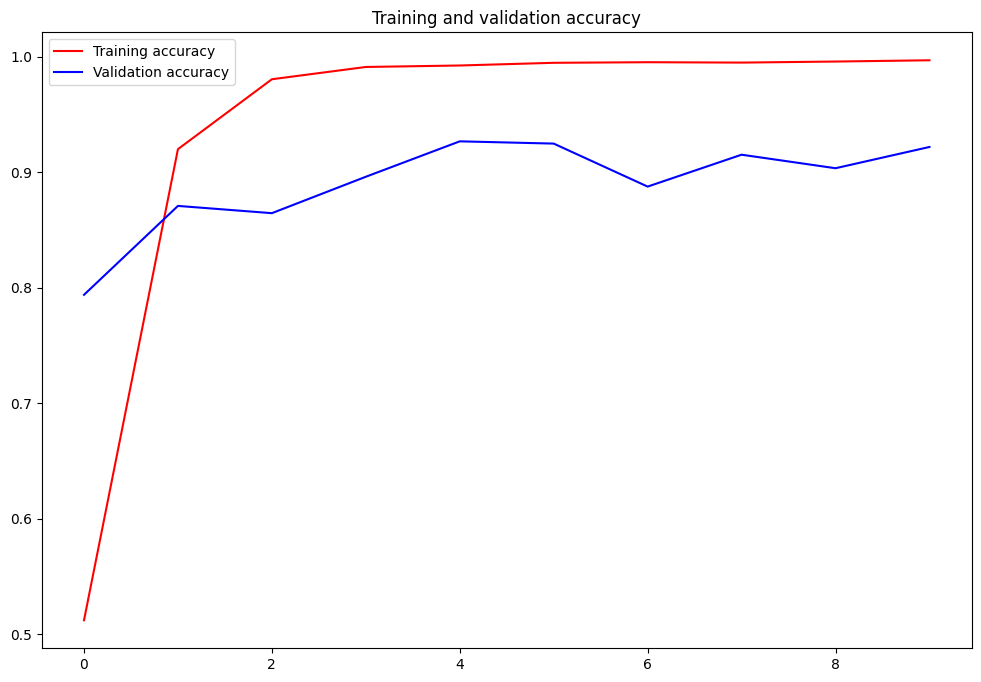

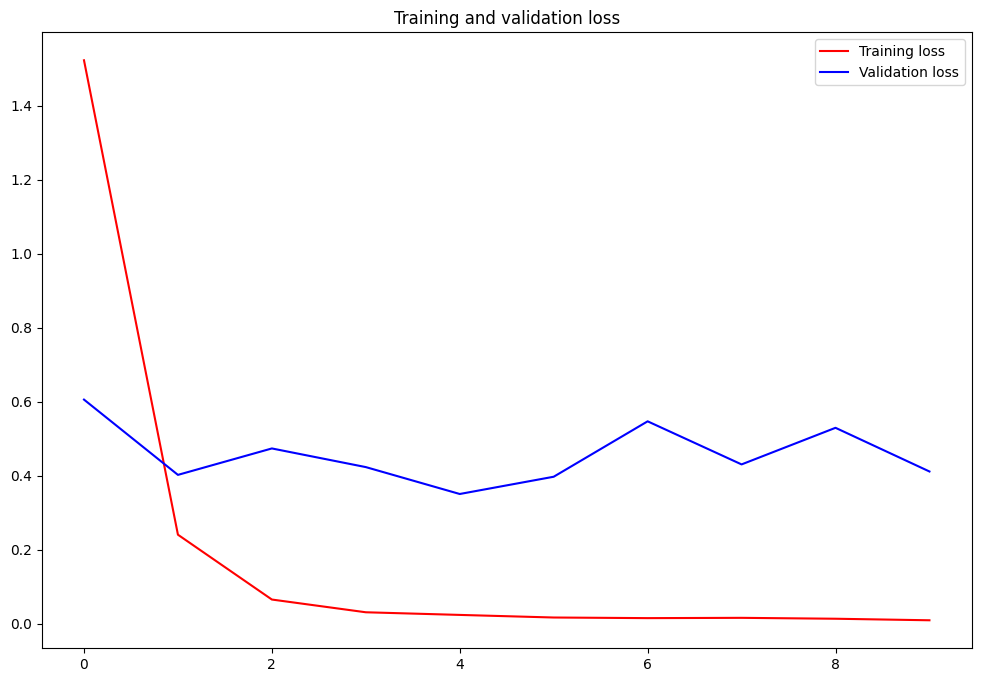

In [23]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The plot shows the training and validation accuracy over epochs during the training process of a hand gesture recognition model. Here is a short interpretation:

### Interpretation

1. **Training Accuracy** (Red Line):
   - The training accuracy starts relatively high and rapidly increases, eventually reaching very close to 1.0 (100%). This indicates that the model is learning the training data very well, potentially too well.

2. **Validation Accuracy** (Blue Line):
   - The validation accuracy starts lower than the training accuracy and increases initially but then fluctuates around a certain range, without a consistent upward trend.
   - The gap between the training and validation accuracy increases as the epochs progress.

The second graph  shows the training and validation loss of a convolutional neural network (CNN) model. The x-axis represents the epochs, which are essentially iterations over the training data. The y-axis represents the loss, which is a measure of how well the model performs on a given set of data.

1. **Training Loss** (Red line)

  The number of epochs increases, the training loss tends to decrease. This indicates that the model is learning the patterns in the training data and improving its performance.In the graph,the training loss (red line) decreases steadily throughout the training process. This suggests that the model is effectively learning from the training data.

2.  **Validation Loss** (Blue line)

 The validation loss should also be monitored to avoid overfitting. Overfitting occurs when the model memorizes the training data too well and fails to generalize to unseen data.In graph,the validation loss (blue line) also starts to decrease and then increases again after a certain number of epochs. This is a sign of overfitting. The model is starting to perform worse on the validation data, which suggests that it is memorizing the training data too well and not generalizing well to unseen data.

